In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### train set 이상치 확인

<AxesSubplot:title={'center':'outliers'}>

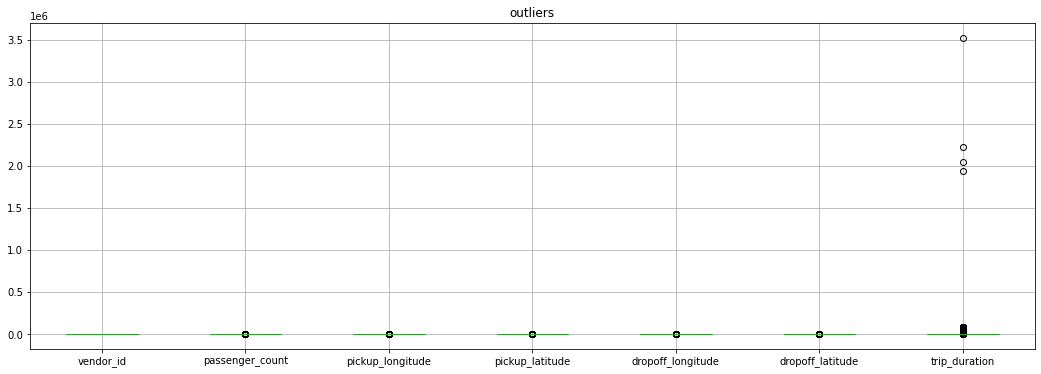

In [6]:
plt.subplots(figsize=(18,6))
plt.title('outliers')
train.boxplot()

trip_duration column에서 이상치 큰 것을 볼 수 있음

### 택시를 타는 시간 구하기

In [8]:
train.pickup_datetime = pd.to_datetime(train.pickup_datetime)
train.dropoff_datetime = pd.to_datetime(train.dropoff_datetime)

In [13]:
train['time_interval'] = train.dropoff_datetime - train.pickup_datetime

In [14]:
train['day_interval'] = time_interval.dt.days

In [15]:
train[train.day_interval > 0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_interval,day_interval
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,22 days 10:48:56,22
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,23 days 17:19:38,23
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,25 days 18:46:52,25
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,40 days 19:31:22,40


Taxi를 하루 이상 타고 있는 것이 말이 안되므로 이상치로 생각하고 제거

In [35]:
train_pre = train[train.day_interval <1]

In [36]:
train_pre

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_interval,day_interval,pickup_hour,pickup_weeday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0 days 00:07:35,0,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0 days 00:11:03,0,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0 days 00:35:24,0,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0 days 00:07:09,0,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0 days 00:07:15,0,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,0 days 00:12:58,0,13,4
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,0 days 00:10:55,0,7,6
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,0 days 00:12:44,0,6,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,0 days 00:06:13,0,15,1


In [37]:
train_pre['pickup_hour'] = train_pre.pickup_datetime.dt.hour

In [38]:
train_pre['pickup_weeday'] = train_pre.pickup_datetime.dt.weekday

### 이동거리 구하기

In [51]:
from haversine import haversine

In [48]:
train_pre = train_pre.reset_index(drop=True)

In [52]:
d=[]
for i in train_pre.index:
    pickup = (train_pre.pickup_latitude[i],train_pre.pickup_longitude[i])
    dropoff = (train_pre.dropoff_latitude[i],train_pre.pickup_longitude[i])
    distance = haversine(pickup, dropoff)
    d.append(distance)

In [53]:
train_pre['distance'] = d

In [55]:
train_pre

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,time_interval,day_interval,pickup_hour,pickup_weeday,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,0 days 00:07:35,0,17,0,0.259595
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,0 days 00:11:03,0,0,6,0.824173
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,0 days 00:35:24,0,11,1,5.988087
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,0 days 00:07:09,0,19,2,1.473586
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,0 days 00:07:15,0,13,5,1.188540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458635,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,778,0 days 00:12:58,0,13,4,0.595118
1458636,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,655,0 days 00:10:55,0,7,6,5.467199
1458637,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,764,0 days 00:12:44,0,6,4,6.830499
1458638,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,373,0 days 00:06:13,0,15,1,0.894586


### 데이터 시각화 해서 확인하기

In [20]:
import seaborn as sns

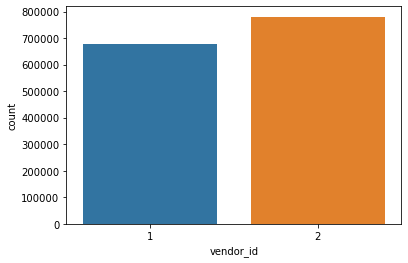

In [39]:
sns.countplot(train_pre.vendor_id)
plt.show()

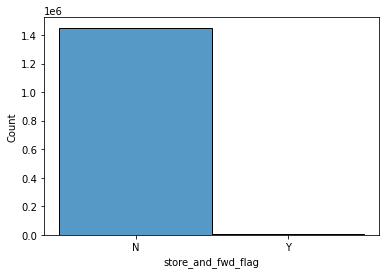

In [40]:
sns.histplot(train_pre.store_and_fwd_flag)
plt.show()

정확히 칼럼의 의미가 이해는 안가는데 데이터 분포를 봤을 때 편차가 심해 삭제해도 크게 문제가 없을 것 같음

In [41]:
train_pre = train_pre.drop('store_and_fwd_flag', axis=1)

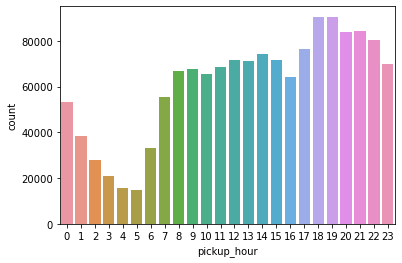

In [42]:
sns.countplot(train_pre.pickup_hour)
plt.show()

새벽 시간에는 택시를 적게 타고 저녁시간에 많이 타는 것을 확인

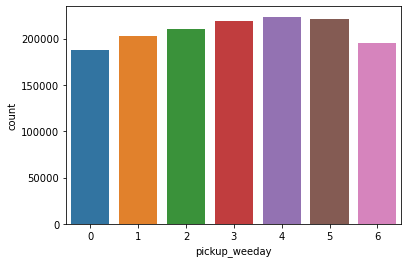

In [56]:
sns.countplot(train.pickup_weeday)
plt.show()

택시 이용이 월 ~ 금까지는 조금씩 늘고 주말에는 줄어드는 양상

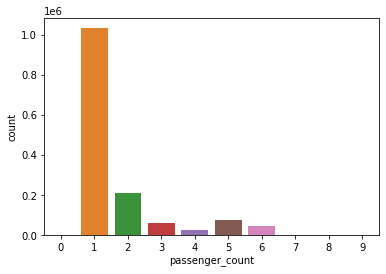

In [43]:
sns.countplot(train_pre.passenger_count)
plt.show()

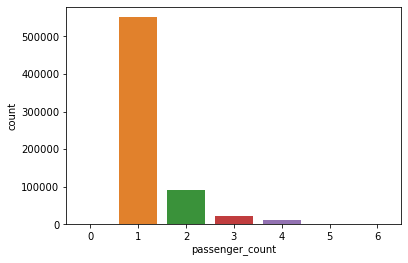

In [44]:
sns.countplot(train_pre[train_pre.vendor_id==1].passenger_count)
plt.show()

vendor_1 에서는 passenger가 최대 6명이 탐

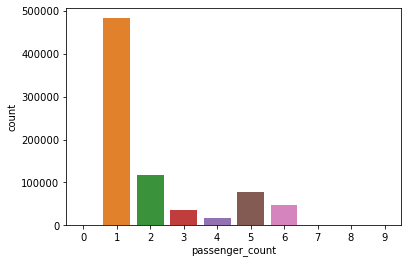

In [45]:
sns.countplot(train_pre[train_pre.vendor_id==2].passenger_count)
plt.show()

vendor_2에서는 passenger가 최대 9명이 탐

0명이 타는 경우는 오류라고 생각됨

In [62]:
train_pre = train_pre[train_pre.passenger_count >0]

### 승차시간(trip_duration)과 이동거리(distance)비교

In [64]:
train_pre = train_pre.sort_values(by='trip_duration').reset_index(drop=True)

In [65]:
train_pre

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,time_interval,day_interval,pickup_hour,pickup_weeday,distance
0,id2959956,1,2016-02-25 04:26:50,2016-02-25 04:26:51,1,-73.806152,40.660206,-73.806267,40.660049,1,0 days 00:00:01,0,4,3,0.017391
1,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,1,0 days 00:00:01,0,12,6,0.006787
2,id2072503,1,2016-01-20 05:53:45,2016-01-20 05:53:46,1,-73.807213,40.658192,-73.807259,40.658051,1,0 days 00:00:01,0,5,2,0.015694
3,id0550194,1,2016-04-20 23:15:08,2016-04-20 23:15:09,1,-73.986282,40.750034,-73.986237,40.750088,1,0 days 00:00:01,0,23,2,0.005938
4,id3686648,1,2016-01-29 11:18:55,2016-01-29 11:18:56,1,-73.971954,40.750137,-73.971985,40.750130,1,0 days 00:00:01,0,11,4,0.000848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458575,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,86385,0 days 23:59:45,0,16,3,2.448766
1458576,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,86387,0 days 23:59:47,0,16,3,5.675469
1458577,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,86390,0 days 23:59:50,0,0,4,1.403173
1458578,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,86391,0 days 23:59:51,0,13,1,11.257195


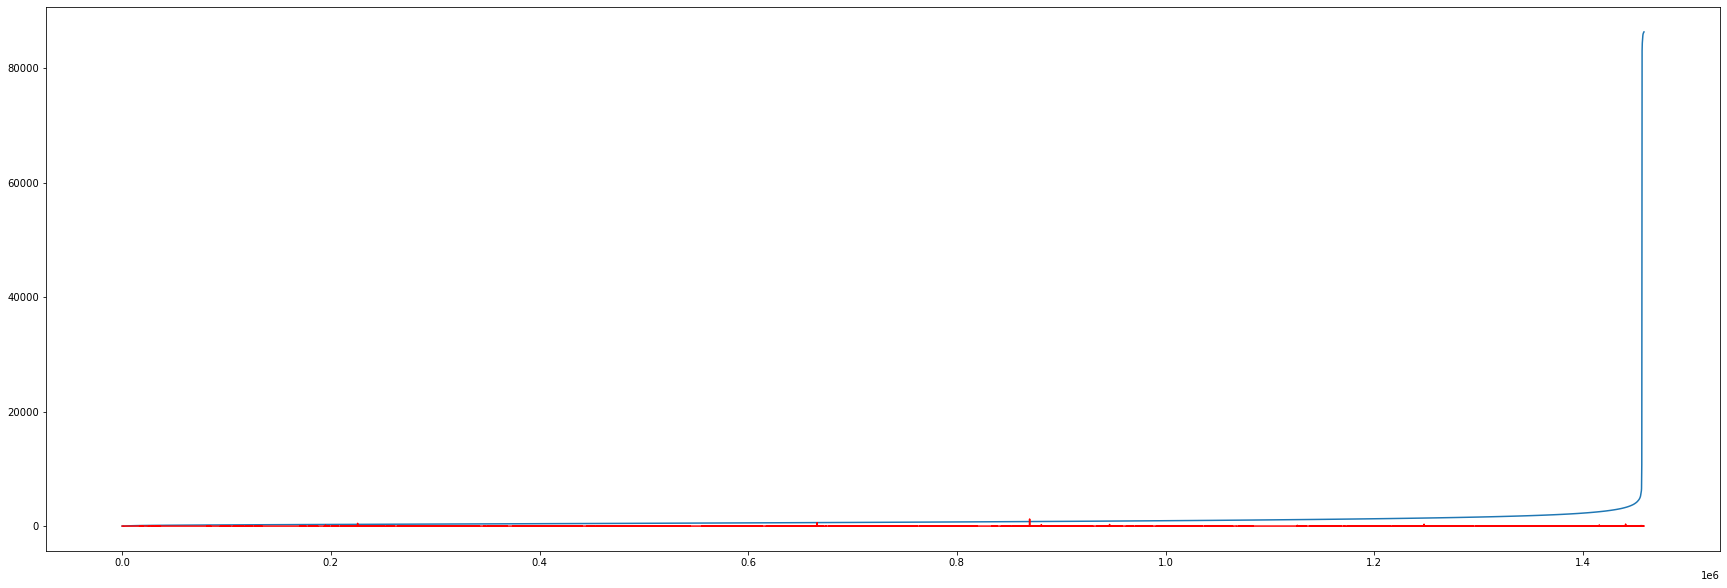

In [72]:
plt.figure(figsize=(30,10))
plt.plot(train_pre.index,train_pre.trip_duration)
plt.plot(train_pre.index, train_pre.distance, c='r')
plt.show()

택시 승차 시간이 길어도 이동거리는 증가하지 않음

### 상관관계

In [76]:
train_pre = train_pre.drop(['time_interval','day_interval'], axis=1)

In [77]:
train_pre.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,pickup_weeday,distance
vendor_id,1.000000,0.287425,0.007827,0.001727,0.001526,0.004484,0.035784,0.009305,0.001311,0.005275
passenger_count,0.287425,1.000000,0.002182,-0.005151,-0.000336,-0.002786,0.014734,0.009084,0.025205,0.008616
pickup_longitude,0.007827,0.002182,1.000000,0.022604,0.783584,0.100213,0.040417,0.010152,-0.016358,0.168888
pickup_latitude,0.001727,-0.005151,0.022604,1.000000,0.114914,0.493999,-0.044113,0.010597,-0.028973,-0.143741
dropoff_longitude,0.001526,-0.000336,0.783584,0.114914,1.000000,0.124894,0.024306,-0.022459,-0.001133,0.093594
dropoff_latitude,0.004484,-0.002786,0.100213,0.493999,0.124894,1.000000,-0.034099,0.013605,-0.021754,-0.106009
trip_duration,0.035784,0.014734,0.040417,-0.044113,0.024306,-0.034099,1.000000,0.005969,-0.001393,0.125140
pickup_hour,0.009305,0.009084,0.010152,0.010597,-0.022459,0.013605,0.005969,1.000000,-0.084251,-0.008507
pickup_weeday,0.001311,0.025205,-0.016358,-0.028973,-0.001133,-0.021754,-0.001393,-0.084251,1.000000,0.017388
distance,0.005275,0.008616,0.168888,-0.143741,0.093594,-0.106009,0.125140,-0.008507,0.017388,1.000000


<AxesSubplot:>

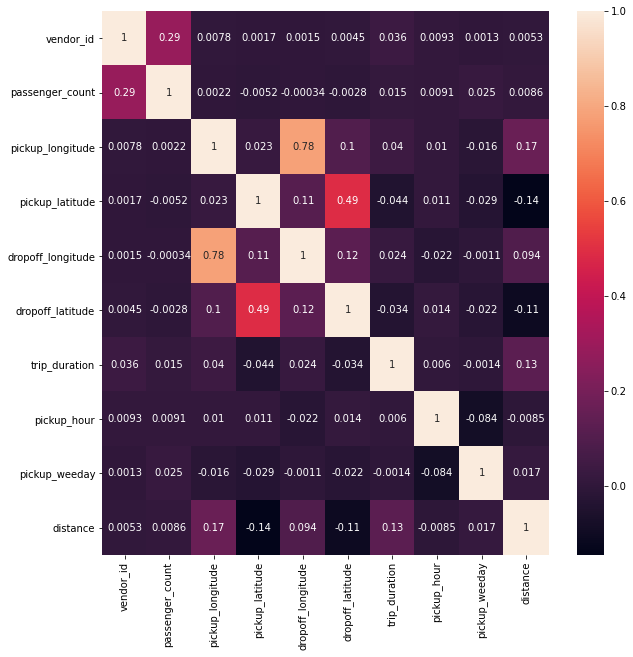

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(train_pre.corr(),annot=True)

### Encoding

In [86]:
from sklearn.preprocessing import OneHotEncoder

In [88]:
ohe = OneHotEncoder()

In [93]:
enco = pd.DataFrame(ohe.fit_transform(train_pre[['vendor_id','pickup_weeday']]).toarray(), columns=['vendor_1','vendor_2','Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])

In [95]:
train_pre = pd.concat([train_pre, enco], axis=1)

### modeling

In [82]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

In [96]:
train_pre

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,distance,vendor_1,vendor_2,Mon,Tue,Wed,Thurs,Fri,Sat,Sun
0,id2959956,1,2016-02-25 04:26:50,2016-02-25 04:26:51,1,-73.806152,40.660206,-73.806267,40.660049,1,...,0.017391,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,1,...,0.006787,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,id2072503,1,2016-01-20 05:53:45,2016-01-20 05:53:46,1,-73.807213,40.658192,-73.807259,40.658051,1,...,0.015694,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,id0550194,1,2016-04-20 23:15:08,2016-04-20 23:15:09,1,-73.986282,40.750034,-73.986237,40.750088,1,...,0.005938,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,id3686648,1,2016-01-29 11:18:55,2016-01-29 11:18:56,1,-73.971954,40.750137,-73.971985,40.750130,1,...,0.000848,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458575,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,86385,...,2.448766,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1458576,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,86387,...,5.675469,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1458577,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,86390,...,1.403173,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458578,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,86391,...,11.257195,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [128]:
X_train = train_pre.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','pickup_weeday','trip_duration'], axis=1)
y_train = train_pre.trip_duration

In [98]:
X_train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,distance,vendor_1,vendor_2,Mon,Tue,Wed,Thurs,Fri,Sat,Sun
0,1,-73.806152,40.660206,-73.806267,40.660049,1,4,0.017391,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,-73.983154,40.767159,-73.983238,40.767097,1,12,0.006787,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,-73.807213,40.658192,-73.807259,40.658051,1,5,0.015694,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,-73.986282,40.750034,-73.986237,40.750088,1,23,0.005938,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,-73.971954,40.750137,-73.971985,40.750130,1,11,0.000848,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458575,1,-73.782089,40.644806,-73.985016,40.666828,86385,16,2.448766,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1458576,1,-73.992279,40.749729,-73.962524,40.800770,86387,16,5.675469,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1458577,1,-73.996010,40.753220,-73.979027,40.740601,86390,0,1.403173,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458578,1,-73.781952,40.644688,-73.993874,40.745926,86391,13,11.257195,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [105]:
xgb = XGBRegressor()

In [129]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### test set도 위와 같이 맞춰주기

In [107]:
test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [108]:
test.pickup_datetime = pd.to_datetime(test.pickup_datetime)

In [113]:
test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_weekday
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,23,3
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,23,3
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,23,3
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,23,3
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,23,3
...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,0,4
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,0,4
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,0,4
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,0,4


In [109]:
test['pickup_hour'] = test.pickup_datetime.dt.hour

In [110]:
test['pickup_weekday'] = test.pickup_datetime.dt.weekday

In [114]:
d=[]
for i in test.index:
    pickup = (test.pickup_latitude[i],test.pickup_longitude[i])
    dropoff = (test.dropoff_latitude[i],test.pickup_longitude[i])
    distance = haversine(pickup, dropoff)
    d.append(distance)

In [115]:
test['distance'] = d

In [118]:
enco_2 = pd.DataFrame(ohe.fit_transform(test[['vendor_id','pickup_weekday']]).toarray(), columns=['vendor_1','vendor_2','Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])

In [120]:
test_pre = pd.concat([test,enco_2], axis=1)

In [123]:
test_pre = test_pre.drop(['id','vendor_id','pickup_datetime','store_and_fwd_flag','pickup_weekday'],axis=1)

In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458580 entries, 0 to 1458579
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   passenger_count    1458580 non-null  int64  
 1   pickup_longitude   1458580 non-null  float64
 2   pickup_latitude    1458580 non-null  float64
 3   dropoff_longitude  1458580 non-null  float64
 4   dropoff_latitude   1458580 non-null  float64
 5   trip_duration      1458580 non-null  int64  
 6   pickup_hour        1458580 non-null  int64  
 7   distance           1458580 non-null  float64
 8   vendor_1           1458580 non-null  float64
 9   vendor_2           1458580 non-null  float64
 10  Mon                1458580 non-null  float64
 11  Tue                1458580 non-null  float64
 12  Wed                1458580 non-null  float64
 13  Thurs              1458580 non-null  float64
 14  Fri                1458580 non-null  float64
 15  Sat                1458580 non-n

In [127]:
test_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   passenger_count    625134 non-null  int64  
 1   pickup_longitude   625134 non-null  float64
 2   pickup_latitude    625134 non-null  float64
 3   dropoff_longitude  625134 non-null  float64
 4   dropoff_latitude   625134 non-null  float64
 5   pickup_hour        625134 non-null  int64  
 6   distance           625134 non-null  float64
 7   vendor_1           625134 non-null  float64
 8   vendor_2           625134 non-null  float64
 9   Mon                625134 non-null  float64
 10  Tue                625134 non-null  float64
 11  Wed                625134 non-null  float64
 12  Thurs              625134 non-null  float64
 13  Fri                625134 non-null  float64
 14  Sat                625134 non-null  float64
 15  Sun                625134 non-null  float64
dtypes:

### Prediction

In [131]:
y_pred = xgb.predict(test_pre)

In [132]:
test['trip_duration'] = y_pred

In [134]:
sub = test[['id','trip_duration']]

In [136]:
sub.to_csv('taxi.csv')